# Multi-layer Perceptron (MLP) Neural Network Implementation in Padasip - Basic Examples

This tutorial explains how to use MLP through several examples.

Lets start with importing Padasip. In the following examples we will also use numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

%matplotlib inline
plt.style.use('ggplot') # nicer plots
np.random.seed(52102) # always use the same random seed to make results comparable

## Classification According to a Truth Table

This task is strongly artificial, because if you know the full truth table of a function, you do not need any classificator. However, it is good simple example for understanding how to MLP can be used.

Let us consider a discrete function described by following table

 <table style="width:80%">
  <tr>
    <td># of input combination</td>
    <td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td> 
    <td>8</td><td>9</td><td>10</td><td>11</td><td>12</td><td>13</td><td>14</td><td>15</td> 
  </tr>
    <tr>
    <td>Input $x_1$</td>
    <td>0</td><td>1</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td><td>1</td> 
    <td>0</td><td>1</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td><td>1</td> 
  </tr>
  <tr>
    <td>Input $x_2$</td>
    <td>0</td><td>0</td><td>1</td><td>1</td><td>0</td><td>0</td><td>1</td><td>1</td>
    <td>0</td><td>0</td><td>1</td><td>1</td><td>0</td><td>0</td><td>1</td><td>1</td> 
  </tr>
  <tr>
    <td>Input $x_3$</td>
    <td>0</td><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>1</td><td>1</td>
    <td>0</td><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>1</td><td>1</td>
  </tr>
  <tr>
    <td>Input $x_4$</td>
    <td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td><td>0</td>
    <td>1</td><td>1</td><td>1</td><td>1</td><td>1</td><td>1</td><td>1</td><td>1</td>
  </tr>
  <tr>
    <td>Output - Target $d$</td>
    <td>0</td><td>1</td><td>1</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td>
    <td>1</td><td>0</td><td>1</td><td>0</td><td>1</td><td>1</td><td>1</td><td>0</td>
  </tr>
</table> 

The task is to train the MLP, that it will produce correct value $\tilde y(k) = d(k)$ every time, when we pass another input vector $\textbf{x}(k) = [x_1(k), x_2(k), x_3(k), x_4(k)]$ to the network.

Now, how to create the MLP neural network with padasip:

In [2]:
nn = pa.ann.NetworkMLP([5,6], 5, outputs=1, activation="tanh") 

where:

* the first argument (value `[5, 6]`) stands for amount of nodes in hidden layers. The first layer has 5 nodes, and the second layer has 6 nodes. If you use [3, 10, 3] instead, you would get three layers with 3, 10 and 3 nodes.

* the second argument (value 5) stands for number of inputs (features).

* the kwarg `outputs=1` says that we want just one output node (it is possible to have more)

* and the kwarg `activation="tanh"` stands for activation function what we want to use. In this case it is hyperbolic tangens.

And the full working example:

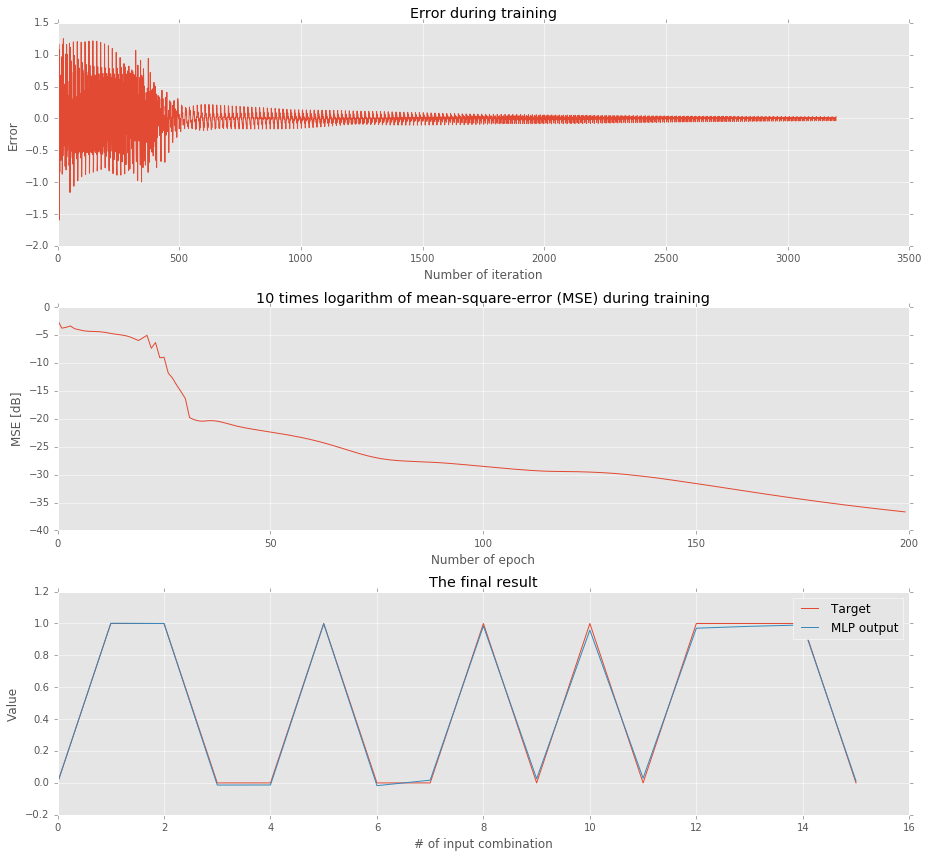

In [3]:
# data creation
x = np.array([
        [0,0,0,0], [1,0,0,0], [0,1,0,0], [1,1,0,0],
        [0,0,1,0], [1,0,1,0], [0,1,1,0], [1,1,1,0],
        [0,0,0,1], [1,0,0,1], [0,1,0,1], [1,1,0,1],
        [0,0,1,1], [1,0,1,1], [0,1,1,1], [1,1,1,1]
    ])
d = np.array([0,1,1,0,0,1,0,0,1,0,1,0,1,1,1,0])
N = len(d)
n = 4

# creation of neural network (again)
nn = pa.ann.NetworkMLP([5,6], n, outputs=1, activation="tanh")    

# training
e, mse = nn.train(x, d, epochs=200)    
    
# see how it works (validation)
y = nn.run(x[-1000:])
       
# display of the result
plt.figure(figsize=(13,12))
plt.subplot(311)
plt.plot(e)
plt.title("Error during training"); plt.ylabel("Error"); plt.xlabel("Number of iteration")

plt.subplot(312)
plt.plot(10*np.log10(mse))
plt.title("10 times logarithm of mean-square-error (MSE) during training");
plt.ylabel("MSE [dB]"); plt.xlabel("Number of epoch")

plt.subplot(313)
plt.plot(d, label="Target")
plt.plot(y, label="MLP output")
plt.title("The final result"); plt.ylabel("Value"); plt.xlabel("# of input combination")
plt.legend(); plt.tight_layout(); plt.show()

Note, that after just only 200 epochs (200 times 16 iterations), and we obtained a pretty impressive result!

# Time series prediction

Discrete-time Mackey-Glass chaotic time serie according to following equation:

$d(k+1) = p_1 \cdot d(k) + \frac{\large{p_2 \cdot d(k-p_3)}}{\large{p_2 + d^{\large{p_5}}(k-p_4)}}$

Part of the generated data we will use for training (in multiple epochs), and another part for validation - one run with no MLP update. See following code and figure.

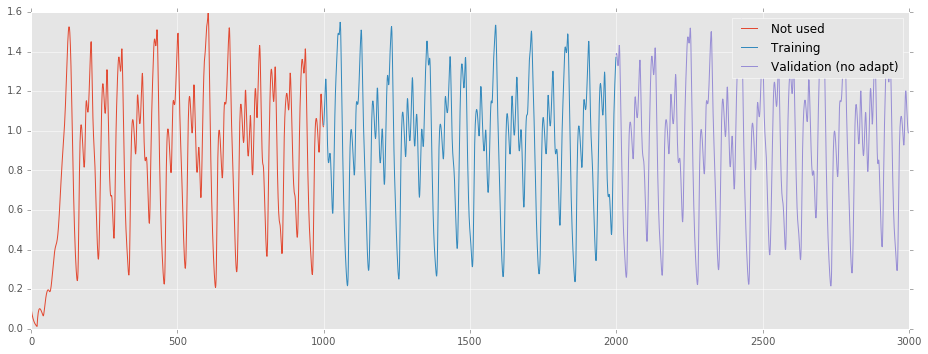

In [4]:
N = 3000
p1 = 0.2; p2 = 0.8; p3 = 0.9; p4 = 20; p5 = 10.0
d = np.zeros(N)
d[0] = 0.1
for k in range(0,N-1):
    d[k+1]  = (p3*d[k]) + ( (p1*d[k-p4]) / (p2 + ( d[k-p4]**p5)) )    

plt.figure(figsize=(13,5))
plt.plot(range(N-2000), d[:-2000], label="Not used")
plt.plot(range(N-2000, N-1000), d[-2000:-1000], label="Training")
plt.plot(range(N-1000, N), d[-1000:], label="Validation (no adapt)")
plt.legend(); plt.tight_layout(); plt.show()

And now the full working example

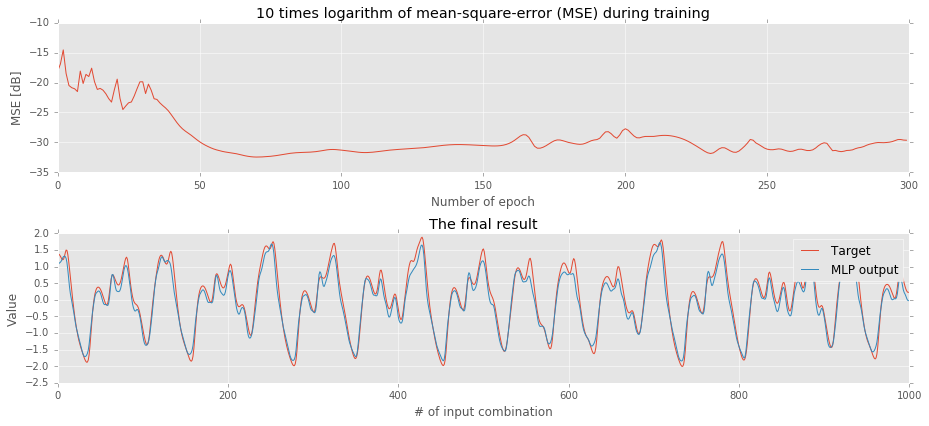

In [5]:
# data creation
N = 3000
p1 = 0.2; p2 = 0.8; p3 = 0.9; p4 = 20; p5 = 10.0
d = np.zeros(N)
d[0] = 0.1
for k in range(0,N-1):
    d[k+1]  = (p3*d[k]) + ( (p1*d[k-p4]) / (p2 + ( d[k-p4]**p5)) )   

# data normalization
d = (d - d.mean()) / d.std()

# input forming from historic values
n = 30
x = pa.input_from_history(d, n)[:-1]
d = d[n:]
N = len(d)


# creation of new neural network
nn = pa.ann.NetworkMLP([10,20,10], n, outputs=1, activation="sigmoid")    

# training
e, mse = nn.train(x[1000:2000], d[1000:2000], epochs=300) 

# see how it works (validation)
y = nn.run(x[-1000:])

# result display
plt.figure(figsize=(13,6))
plt.subplot(211)
plt.plot(10*np.log10(mse))
plt.title("10 times logarithm of mean-square-error (MSE) during training");
plt.ylabel("MSE [dB]"); plt.xlabel("Number of epoch")

plt.subplot(212)
plt.plot(d[-1000:], label="Target")
plt.plot(y, label="MLP output")
plt.title("The final result"); plt.ylabel("Value"); plt.xlabel("# of input combination")
plt.legend(); plt.tight_layout(); plt.show()

The prediction output is pretty good, if we consider the fact, that the used time series is produced by chaotic system. And it is possible to achieve even better result, if you increase the number of epochs for training.

# MLP as a Real-time Predictor

It is possible and simple to use MLP sample after sample to track the output of system with changing dynamics. Problem is, that MLP is learning speed is low - in comparison with adaptive filters. Because of that reason, you can really struggle to train the MLP, or even to be able to follow the changes in the process you want to predict.

In this tutorial we will use a really simple example. Let us consider a system described as follows

$d(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)$

where

* $a_i$ is unknown parameter of the system

* $x_i$ is input of the system (random variable with zero mean and 0.5 standard deviation)

In this example we can measure all three $x_n$, and we need to find the weights of MLP to replace the system. Here is how to get it done:

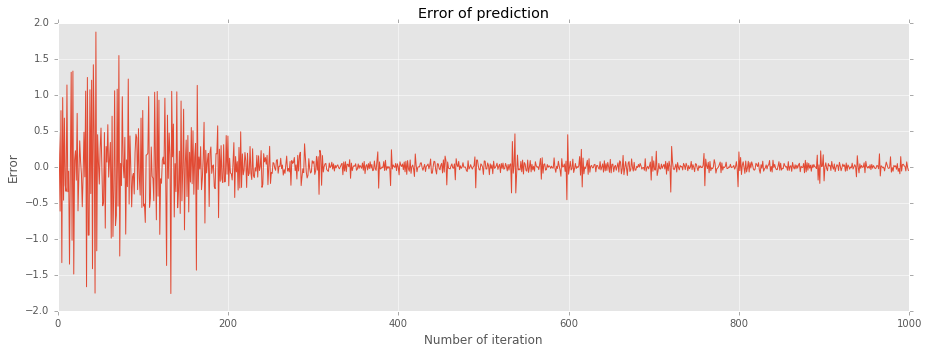

In [6]:
def measure_x():
    # this is your measurement of the process inputs (3 values)
    x = np.random.normal(0, 0.5, 3)
    return x

def measure_d(x):
    # this is your measurement of the system output - your target
    d = 0.8*x[0] + 0.2*x[1] - 1.*x[2]
    return d

# creation of new neural network
nn = pa.ann.NetworkMLP([20,20], 3, outputs=1, activation="sigmoid")   

# run for N samples
N = 1000
e = np.zeros(N)
for k in range(N):
    x = measure_x()
    y = nn.predict(x)
    # do the stuff with predicted value
    # ...
    # when possible, measure what was the real value of output and update MLP
    d = measure_d(x)
    e[k] = nn.update(d)

plt.figure(figsize=(13,5))
plt.plot(e)
plt.title("Error of prediction"); plt.ylabel("Error"); plt.xlabel("Number of iteration")
plt.tight_layout(); plt.show()

# Final notes

* If your MLP is unstable (overflow error or similar), then normalize your data or use the `sigmoid` as activation function rather than `tanh`.

* If the learning is too slow, try to reduce the amount of layers or nodes.

* Beware of overtraining. If your training error is still decreasing, it does not automatically mean that also your testing error is decreasing. 